In [103]:
from transformers import LayoutLMv3Processor,LayoutLMv3ImageProcessor
from PIL import Image
from torchvision.utils import save_image,draw_bounding_boxes,make_grid
import matplotlib.pyplot as plt
from torchvision.transforms.functional import convert_image_dtype
from  torchvision.ops import box_convert
import torch

In [75]:
processor = LayoutLMv3Processor.from_pretrained('microsoft/layoutlmv3-large')
img_processor = LayoutLMv3ImageProcessor.from_pretrained('microsoft/layoutlmv3-large')

In [6]:
img = Image.open('tinywow_letok-11-2023-web_26381759_22.png')

In [86]:
encoded_img = processor(img, return_tensors="pt")
processed_img = img_processor(img,do_resize = False, ocr_lang='mkd', return_tensors="pt")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [110]:
torch.tensor(processed_img['boxes'])

tensor([[[ 53,  33, 176,  52],
         [179,  33, 285,  52],
         [292,  33, 399,  52],
         [534,  36, 656,  55],
         [661,  36, 766,  55],
         [773,  36, 900,  55],
         [ 56,  60, 171,  79],
         [176,  60, 238,  79],
         [246,  61, 290,  79],
         [298,  59, 343,  81],
         [537,  64, 629,  82],
         [634,  64, 684,  82],
         [693,  62, 741,  84],
         [725, 259, 742, 268],
         [750, 263, 791, 270],
         [795, 263, 806, 270],
         [810, 263, 875, 271],
         [ 48, 263,  91, 270],
         [ 95, 263, 107, 270],
         [113, 263, 140, 270],
         [257, 259, 258, 260],
         [273, 259, 275, 260],
         [282, 259, 493, 271],
         [507, 259, 508, 260],
         [522, 263, 649, 271],
         [578, 257, 608, 274],
         [614, 263, 649, 271],
         [741, 270, 742, 271],
         [725, 281, 726, 285],
         [750, 273, 788, 285],
         [791, 274, 820, 281],
         [ 39, 273,  41, 285],
        

In [115]:
processed_img['pixel_values'].shape

torch.Size([1, 3, 2339, 1653])

In [62]:
enc_img = encoded_img['pixel_values'][0].permute(1, 2, 0)

In [71]:
def draw_tensor_img(tensor_img):
    plt.imshow(tensor_img.permute(1, 2, 0))
    plt.show()

In [97]:
int_img = convert_image_dtype(processed_img['pixel_values'][0], dtype=torch.uint8)

In [112]:
bb_img = draw_bounding_boxes(int_img, processed_img['boxes'], width=2)

TypeError: list indices must be integers or slices, not tuple

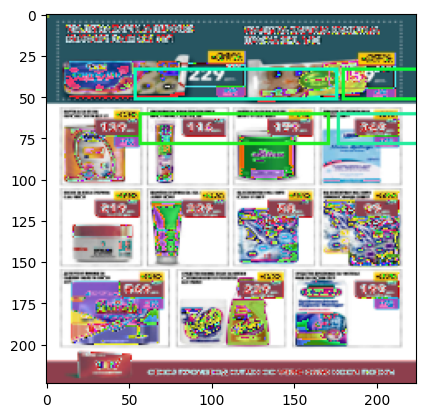

In [73]:
draw_tensor_img(bb_img)